<a href="https://colab.research.google.com/github/xalejandrow/descriptive-statistics-exercises-project-with-python/blob/main/rbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Percentiles

In statistics, a k-th percentile (percentile score or centile) is a score below which a given percentage k of scores in its frequency distribution falls (exclusive definition) or a score at or below which a given percentage falls (inclusive definition). For example, the 50th percentile (the median) is the score below which (exclusive) or at or below which (inclusive) 50% of the scores in the distribution may be found. Percentiles are expressed in the same unit of measurement as the input scores; for example, if the scores refer to human weight, the corresponding percentiles will be expressed in kilograms or pounds.

The 25th percentile is also known as the first quartile (Q1), the 50th percentile as the median or second quartile (Q2), and the 75th percentile as the third quartile (Q3).

In numpy we call the function np.percentile

In [1]:
import numpy as np
my_array = np.array([0,1,2,3,4,5,6,7,8,9,10])

np.percentile(my_array, 50) # Or the median or Q2

5.0

In [2]:
np.percentile(my_array, 25)

2.5

In [4]:
my_matrix = np.array([[3,4,5],
                      [6,7,8]])
np.percentile(my_matrix, 50)

5.5

# Random Variables

We are going to start by defining what exactly is a Random Variable. The first important aspect to consider is that it is not a traditional variable. A random variable can take many different values with different probabilities, so we cannot solve for them in the traditional way, for instance in the equation $y = x + 5$. It makes more sense to talk about the probability of a Random Variable being less than or greater than some value. In short, a Random Variable maps outcomes of random processes to numbers.

The simplest and most traditional example for us to think about it is a coin flip.

$$ X=   \left\{
\begin{array}{ll}
      1 \quad \text{if "heads"} \\
      0 \quad \text{if "tails"} \\
\end{array} 
\right.  $$

The possible outcomes are "heads" and "tails", which we have quantified to 1 and 0, respectively. 

# Bernoulli Random Variable

Random Variables can be either discrete or continuous. We will start by focusing on the discrete Random Variables. By definition, discrete variables can only take distinct values, such as in the example above of the flip of a coin. For these variables you can count the number of different values it can take on.

Our Random Variable $X$ defined above is actually a Bernoulli Random Variable. It can take the value 1 with probability $p$, in the case of a fair coin $p$ is equal to 0.5 or 50% and the value 0 with probability $q = 1-p$. Its Probability Mass Function can then be defined as:

$$P(X=k) = \left\{
\begin{array}{ll}
      p \quad &\text{if k=1} \\
      q=1-p \quad &\text{if k=0} \\
\end{array} \right.$$


In [6]:
p = 0.7
q = 0.3 #(1-p)

In [11]:
mean = p
variance = p*q

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, binom
import seaborn as sns
from IPython.display import Image

Let's start by defining a Bernoulli Random Variable $X$ with success probability of $p=0.3$.

In [7]:
p = 0.3
X = bernoulli(p)

We can print the values for its Probability Mass Function on $0$ and $1$.

In [8]:
print(np.round(X.pmf(1),2))
print(np.round(X.pmf(0), 2))

0.3
0.7


To help up visualize, let's arrive at the same values empirically, by drawing $10,000$ samples from our variable. 

In [9]:
X_samples = X.rvs(100000)

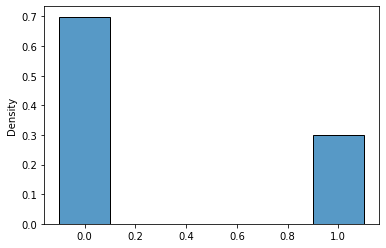

In [10]:
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

It looks as expected, we have a $0.3$ probability of success and a $0.7$ probability of failure.

Let's define the mean and variance of the distribution.

$$\begin{align}
\mu &= (1-p)\cdot0+p\cdot1=p \\
\sigma^2 &= (1-p) \cdot (0-p)^2 + p \cdot (1-p)^2 = \\
&= (1-p) \cdot p^2 + p(1-2p+p^2) = \\
&= p^2 - p^3 + p -2p^2+p^3 = \\
&= p - p^2 = \\
&= p(1-p)
\end{align}$$

We can compare our empirically calculated mean with the theoretical mean that we just derived. They are indeed very close and they would become closer as the sample size increases.

In [ ]:
print('Empirically calculated mean: {}'.format(X_samples.mean()))
print('Theoretical mean: {}'.format(p))

print('Empirically calculated standard deviation: {}'.format(X_samples.std()))
print('Theoretical standard deviation: {}'.format((p*(1-p))**(1/2)))

Empirically calculated mean: 0.30051
Theoretical mean: 0.3
Empirically calculated standard deviation: 0.4584798140594633
Theoretical standard deviation: 0.458257569495584


# Binomial Random Variable

We can look at a Binomial Random Variable (RV) as a set of Bernoulli experiments or trials. This way our understanding of how the properties of the distribution are derived becomes significantly simpler.

Before diving into definitions, we need to start with the main conditions that need to be fulfilled to define our RV as Binomial:
* The trials are independent
* Each trial can be classified as either success or failure
* Fixed number of trials
* The probability of success on each trial is constant

Let's define the RV $Z$ as the number of success afer $n$ trials where P(success) for each trial is p.

Let's also define $Y$, a Bernoulli RV with $P(Y=1)=p$ and $P(Y=0)=1-p$.

Y represents each independent trial that composes Z. We already derived both the variance and expected value of Y above.

$$\begin{aligned} 
\mathbb{E}(Y)&=p \\
\text{Var}(Y)&=p(1-p)
\end{aligned}$$

Using the following property $\mathbb{E}(X+Y)=\mathbb{E}(X)+\mathbb{E}(Y)$, we can derive the expected value of our Binomial RV $Z$:

$$\begin{aligned}
X &= Y + Y + ... + Y \\
\mathbb{E}(Z) &= \mathbb{E}(Y + Y + ... + Y) \\
\mathbb{E}(Z) &= \mathbb{E}(Y) + \mathbb{E}(Y) + ... + \mathbb{E}(Y) \\
\mathbb{E}(Z) &= n\mathbb{E}(Y) \\
\mathbb{E}(Z) &= np
\end{aligned}
$$

Recall that we have $n$ independent trials or $n$ RV $Y$ being summed.

When deriving the $\text{VAR}(Y)$, the process is the same, because $\text{VAR}(X+Y)=\text{VAR}(X)+\text{VAR}(Y)$ is also true. Then we have:

$$\begin{aligned}
\text{VAR}(Z) &= \text{VAR}(Y + Y + ... + Y) \\
\text{VAR}(Z) &= \text{VAR}(Y) + \text{VAR}(Y) + ... + \text{VAR}(Y) \\
\text{VAR}(Z) &= n\text{VAR}(Y) \\
\text{VAR}(Z) &= np(1-p) \\
\end{aligned}
$$

Let's now test our theoretical understanding with an experiment.

In [ ]:
n=6
p = 0.3
Y = bernoulli(p)

We defined our $Y$ variable. We can construct our $X$ variable from this $Y$ variable as defined above, these are the Bernoulli independent trials. Let's assume that we have 6 independent trials.

In [ ]:
Y_samples = [Y.rvs(1000000) for i in range(6)]
Y_samples

[array([1, 0, 0, ..., 0, 0, 1]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 1, 0])]

In [ ]:
Z_samples = sum(Y_samples)

In [ ]:
print('Empirically calculated expected value: {}'.format(Z_samples.mean()))
print('Theoretical expected value: {}'.format(n*p))

Empirically calculated expected value: 1.800969
Theoretical expected value: 1.7999999999999998


In [ ]:
print('Empirically calculated variance: {}'.format(Z_samples.var()))
print('Theoretical variance: {}'.format(n*p*(1-p)))

Empirically calculated variance: 1.2599156610389997
Theoretical variance: 1.2599999999999998


We feel better about our theoretical derivations as our experiment shows that we are indeed correct.

We can also plot our Binomial distribution. Remember that it is a discrete distribution.

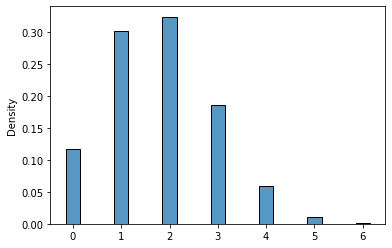

In [ ]:
sns.histplot(Z_samples, stat="density", discrete=True, shrink=0.3);

# Binomial PMF and CDF

The Binomial Probability Mass Function (PMF) can be written in the following way:

$$P(Z=k) = {{n}\choose{k}} p^k (1-p)^{(n-k)}$$

It seems a bit daunting at first, let's try to break it down into smaller interpretable pieces.

${{n}\choose{k}}$ is just the binomial coefficient or the number of different ways we can choose $k$ items from $n$ possible ones when the order does not matter, i.e. the set ABC is the same as CBA.

$${{n}\choose{k}} = \frac{n!}{k!(n-k)!}$$

Recall that  $\frac{n!}{(n-k)!}$ is the number of permutations or the number of different ways we can choose $k$ items from $n$ possible ones when the order matters, i.e. ABC and CBA counts as two different results. $k!$ is just the number of ways to arrange $k$ items. For example, in the case of 3 items and 3 positions we have the following possibilities:

$$\begin{aligned}
ABC \\
ACB \\
BAC \\
BCA \\
CAB \\
CBA\end{aligned}$$

Recall that $3!=3 \cdot 2 \cdot 1= 6$.

Let's start building small functions to handle our different components, starting with a function to compute the factorial of an input argument.

In [ ]:
def fact(n):
    x = 1
    for i in range(1, n+1):
        x *= i
    return x

fact(3)

6

Now, we can use our function `fact()` inside of another function that computes the binomial coefficient.

In [ ]:
def comb(n, k):
    x = 1
    return fact(n)/(fact(k)*fact(n-k))

comb(6, 3)

20.0

And finally, putting everything together:

In [ ]:
def binompmf(prob, n, k):
    return comb(n,k)*prob**k*(1-prob)**(n-k)

A useful function that you often find in statistical packages together with the PMF of a distribution is the Cumulative Distribution Function (CDF). It is nothing more than the probability that our RV takes values up to an $z$:

$$P(Z\leq z)$$

In [ ]:
def binomcdf(prob, n, x):
    result = 0
    for x_ in range(0, x+1):
        result += binompmf(prob, n, x_)
    return result

Let's try it out. 


We want to assess the probability distribution that models Cristiano Ronaldo's ability to score free-kicks. We will be using the table below, which shows Ronaldo's free-kick record in La Liga and in the Champions League:

In [ ]:
import pandas as pd
my_df = pd.DataFrame({'Competition':['La Liga','Champions','Total'], 
                      'Free_Kick_Goals':[20,10,30], 
                      'Free_Kicks_Taken':[301,106,407], 
                      'Accuracy':[0.066, 0.094, 0.073]})

In [ ]:
my_df

,Competition,Free_Kick_Goals,Free_Kicks_Taken,Accuracy
0,La Liga,20,301,0.066
1,Champions,10,106,0.094
2,Total,30,407,0.073


Ronaldo has a  0.094 probability of successfully convert a free-kick in the Champions League. Based on that, what is Ronaldo's probability of scoring 1 out of 7 free-kicks in the Champions League?

In [ ]:
binompmf(0.094, 7, 1)

0.3639109131870316

What is the probability of scoring less than 2?

In [ ]:
binomcdf(0.094, 7, 1)

0.8649797389430357